Complete all exercises at your own pace and using original work. Please do not copy/paste code you find online or from your neighbors. You may discuss solutions but make sure that you write your own answer. For references on available functions/methods, consult the Qiskit documentation at https://qiskit.org/documentation/. 

Please complete these exercises inside your personal GitHub repository for the class. After each few problems, you should make sure to save your work and commit changes to your GitHub repository. You can do this using the following steps:

Step 1) Open a terminal.

Step 2) `cd` to the folder where your GitHub repository is located.

Step 3) Run `git add .` to add all changes in your repository.

Step 4) Run `git commit -m 'write a descriptive message to remind yourself/others of the changes you are committing'`.

Step 5) Run `git push` to upload your changes to GitHub.

Step 6) Open your repository on GitHub to confirm changes have been committed.

Good luck!

1. Create a quantum circuit with Qiskit that consists of a single qubit and a Hadamard gate applied to it. Print the circuit and draw its visualization using the draw method.

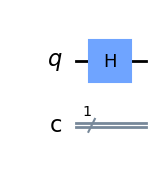

In [2]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(1, 1)
circ.draw(output='mpl')
circ.h(0)
circ.draw(output='mpl')

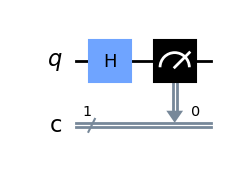

In [3]:
circ.measure(0, 0)
circ.draw(output='mpl')

2. Simulate the above circuit using the Aer `qasm_simulator` provided by Qiskit using 1000 shots. Print the result of your shots. Does it make sense?

In [4]:
from qiskit import Aer, execute
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1000)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

{'0': 517, '1': 483}


3. Simulate the above circuit using the Aer `statevector_simulator` provided by Qiskit. Print the resulting statevector.

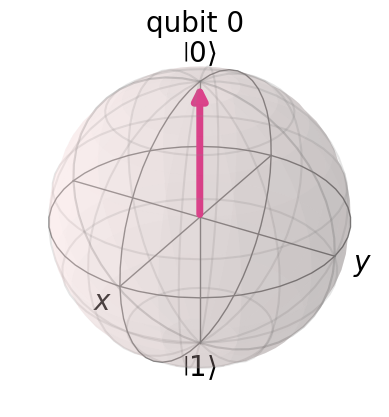

In [5]:
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_bloch_multivector

circ = QuantumCircuit(1, 1)

backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend=backend, shots=1, memory=True)
job_result = job.result()

plot_bloch_multivector(job_result.get_statevector(circ))

4. Create a function that takes a single qubit quantum circuit as input and returns the probability of measuring the qubit in the state |0⟩.

In [6]:
from qiskit import *
circuit = QuantumCircuit(1, 1)
circuit.z(0)
circuit.measure(range(1), range(1))
circuit.draw()

┌───┐┌─┐
  q: ┤ Z ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [7]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(circuit, backend), shots=1000)
result = job.result()
count = result.get_counts(circuit)
print(count)

{'0': 1000}


5. Create a quantum circuit with Qiskit that consists of two qubits and a CNOT gate applied to them. Print the circuit and draw its visualization using the draw method.

In [8]:
from qiskit import *
quant = QuantumCircuit(2, 1)
quant.z(0)
quant.z(1)
quant.cnot(0, 1)
quant.measure(range(1), range(1))
quant.draw()

┌───┐     ┌─┐
q_0: ┤ Z ├──■──┤M├
     ├───┤┌─┴─┐└╥┘
q_1: ┤ Z ├┤ X ├─╫─
     └───┘└───┘ ║ 
c: 1/═══════════╩═
                0

6. Simulate the above circuit using the Aer `qasm_simulator` provided by Qiskit. Print the resulting counts using the counts method.

In [9]:
backed = Aer.get_backend('qasm_simulator')
jobed = backed.run(transpile(quant, backed), shots=1024)
resulted = jobed.result()
counted = resulted.get_counts(quant)
print(counted)

{'0': 1024}


7. Did you only get '00' counts from the previous measurement? If so, what single gate can you add to the beginning of the circuit such that measurements always give '11'?

In [10]:
from qiskit import *
quant = QuantumCircuit(2, 1)
quant.x(0)
quant.h(1)
quant.cnot(0, 1)
quant.measure(range(1), range(1))
quant.draw()

┌───┐     ┌─┐
q_0: ┤ X ├──■──┤M├
     ├───┤┌─┴─┐└╥┘
q_1: ┤ H ├┤ X ├─╫─
     └───┘└───┘ ║ 
c: 1/═══════════╩═
                0

In [11]:
backed = Aer.get_backend('qasm_simulator')
jobed = backed.run(transpile(quant, backed), shots=1024)
resulted = jobed.result()
counted = resulted.get_counts(quant)
print(counted)

{'1': 1024}


8. What can I change such that this creates a Bell state? Do this and then perform a measurement using both `qasm_simulator` and `statevector_simulator`. For the statevector simulator, make sure you understand the output. Describe in words the difference between these two simulators.

In [12]:
bellCirc=QuantumCircuit(2,2)
bellCirc.h(0)
bellCirc.cnot(0,1)

backend = Aer.get_backend('statevector_simulator')
job = backend.run(bellCirc)
result = job.result()
outputstate = result.get_statevector(bellCirc, decimals=3)
print(outputstate)
outputstate.draw('latex')

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

In [13]:
bellCirc.measure(range(2), range(2))
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = backend_sim.run(transpile(bellCirc, backend_sim), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(bellCirc)
print(counts)

{'11': 506, '00': 518}


In [14]:
# The statevector simulator and the qasm_simulator show different measures of the bell state quantum circuit as the qasm_simulator
# uses the measure of the circuit to calculate the probability of the qubit of either being "00" or "11" in a probabilistic, while the
# statevector simulator calculates of the qubit under deterministic manners by pointing the exact measurements and probablities down
# to the last decimal so as to interpret it under a purely noiseless state of execution.

9. 
a) Write any two-qubit circuit on paper.
b) Carry out the by-hand matrix multiplication to find both the net unitary matrix and final state.
c) Code the 2 qubit circuit using qiskit
d) Use the `unitary_simulator` and `statevector_simulator` to extract the net unitary matrix and final state to compare with your by-hand result.

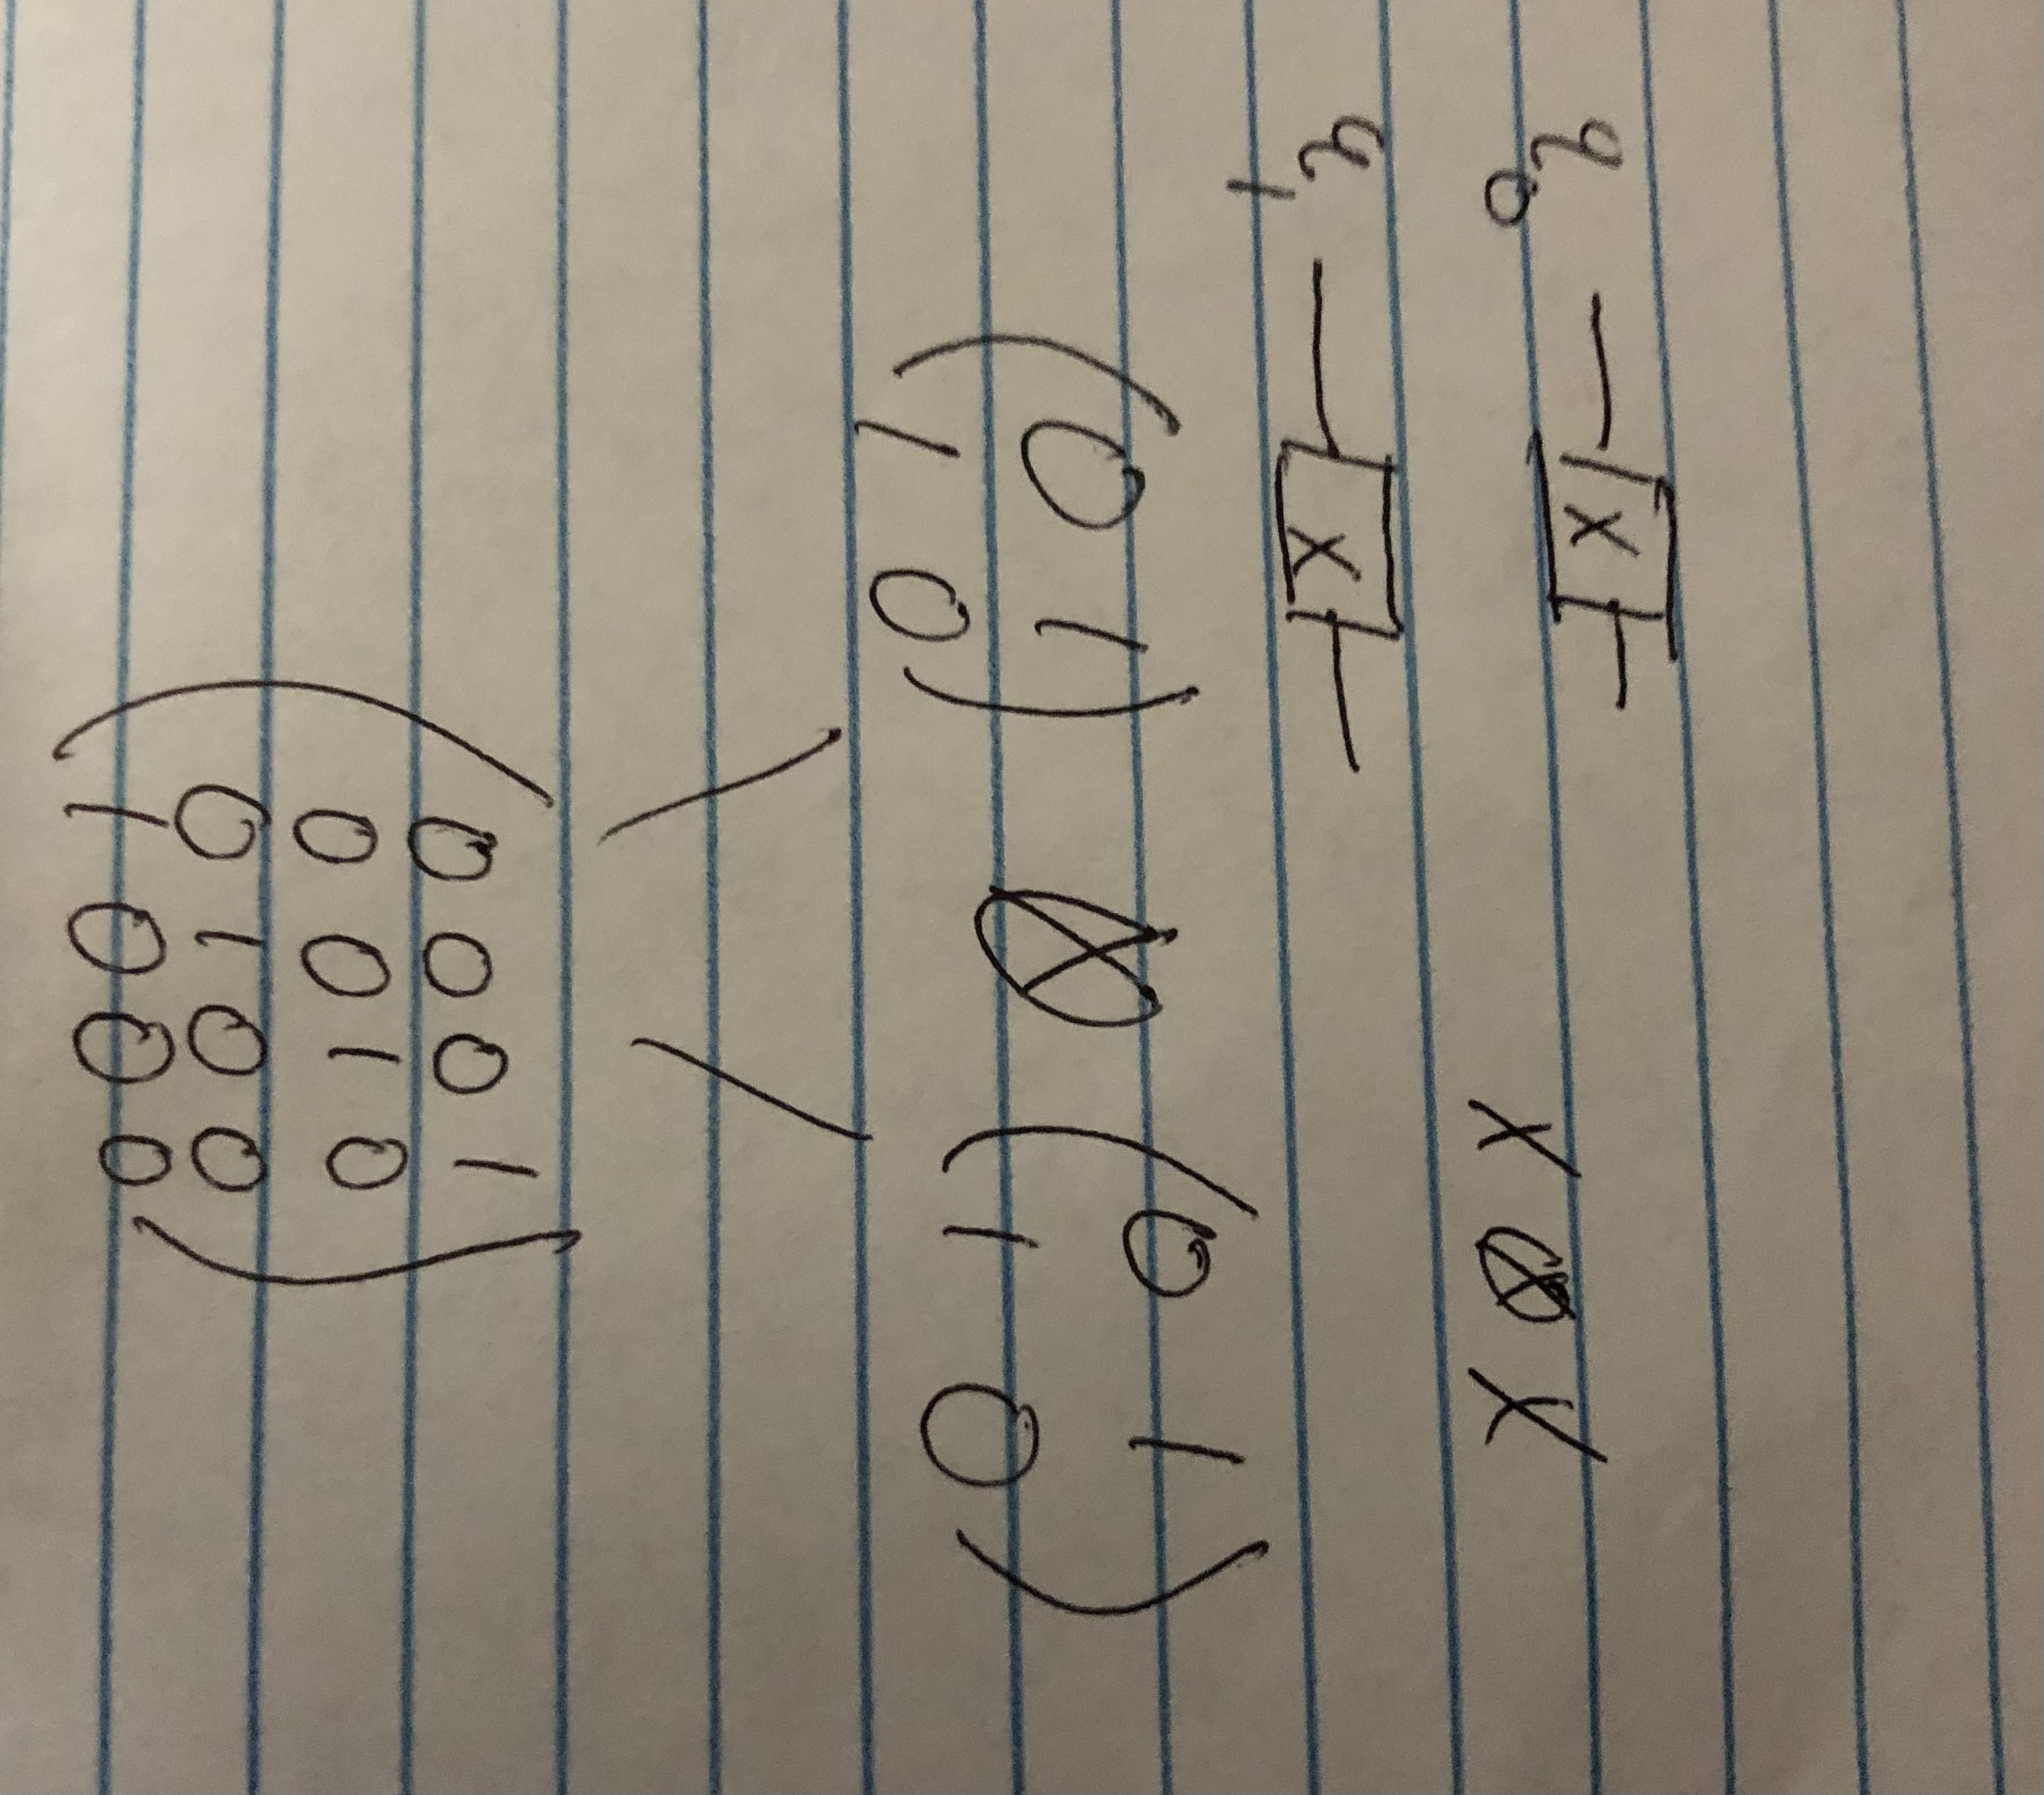

In [28]:
circ=QuantumCircuit(2, 1)
circ.x(0)
circ.x(1)
circ.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘
c: 1/═════

In [16]:
backend_sim = Aer.get_backend('unitary_simulator')
job = execute(circ, backend_sim)
result = job.result()

print(result.get_unitary(circ, decimals=3))

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [17]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)
outputstate.draw('latex')

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

10. Using Qiskit, write a two-qubit circuit where a single Hadamard acts on the 0th qubit and a single X acts on the 1st qubit. Extract the unitary matrix for this circuit using code and calculate this matrix by-hand.

In [18]:
from qiskit import *
import numpy as np
circ = QuantumCircuit(2,1)
circ.h(0)
circ.x(1)
circ.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘
c: 1/═════

In [19]:
backend_sim = Aer.get_backend('unitary_simulator')
job = execute(circ, backend_sim)
result = job.result()

print(result.get_unitary(circ, decimals=3))

Operator([[ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


11.  Prove using both by-hand calculation and qiskit/numpy that the single-qubit circuits (1: HZH, 2: RX(pi) 3: X) are equivalent. Remember that global phases can be neglected.

In [20]:
from qiskit import *
from math import pi
circ = QuantumCircuit(1,1)
circ.h(0)
circ.z(0)
circ.h(0)
circ.draw()

┌───┐┌───┐┌───┐
  q: ┤ H ├┤ Z ├┤ H ├
     └───┘└───┘└───┘
c: 1/═══════════════

In [21]:
backend_sim = Aer.get_backend('unitary_simulator')
job = execute(circ, backend_sim)
result = job.result()
print(result.get_unitary(circ, decimals=3))

Operator([[ 0.+0.j,  1.+0.j],
          [ 1.+0.j, -0.-0.j]],
         input_dims=(2,), output_dims=(2,))


In [23]:
circTwo = QuantumCircuit(1,1)
circTwo.rx(pi,0)
circTwo.draw()

┌───────┐
  q: ┤ Rx(π) ├
     └───────┘
c: 1/═════════

In [24]:
backend_sim = Aer.get_backend('unitary_simulator')
job = execute(circTwo, backend_sim)
result = job.result()

print(result.get_unitary(circTwo, decimals=3))

Operator([[0.+0.j, 0.-1.j],
          [0.-1.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [25]:
circThree = QuantumCircuit(1,1)
circThree.x(0)
circThree.draw()

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

In [26]:
backend_sim = Aer.get_backend('unitary_simulator')
job = execute(circThree, backend_sim)
result = job.result()

print(result.get_unitary(circThree, decimals=3))

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


(Extra) Do the same for the circuit identities listed at https://qiskit.org/textbook/ch-gates/more-circuit-identities.html